In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from itertools import product
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset from the CSV file
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [ ]:
# Show how many row and column we have
df.shape

(6607, 20)

In [ ]:
# Show first 10 data object
df.head(10)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   
5                        Yes            8               89           Medium   
6                        Yes            7               68              Low   
7                        Yes            6               50           Medium   
8                         No            6               80             High   
9                        Yes            8               71           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   
5             Yes                  3        Medium          Medium   
6             Yes                  1           Low          Medium   
7             Yes                  1          High            High   
8             Yes                  0        Medium             Low   
9             Yes                  0          High            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   
5      Public       Positive                  3                    No   
6     Private        Neutral                  2                    No   
7      Public       Negative                  2                    No   
8     Private        Neutral                  1                    No   
9      Public       Positive                  5                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70  
5             Postgraduate               Near    Male          71  
6              High School           Moderate    Male          67  
7              High School                Far    Male          66  
8                  College               Near    Male          69  
9              High School           Moderate    Male          72

In [ ]:
# More info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Type conversion of values that appear numeric but are actually categorical

threshold = 10

for column in df.select_dtypes(include=['int64']).columns:
    if df[column].nunique() <= threshold:
        df[column] = df[column].astype('object')

In [ ]:
# Type conversion of values that appear categorical but are actually numerical
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() > threshold:
        df[column] = df[column].astype('int64')

In [ ]:
# Check if type conversion is successfull
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   object
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   object
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Get descriptive statistics for numerical columns
df.describe()

Hours_Studied   Attendance  Previous_Scores   Exam_Score
count    6607.000000  6607.000000      6607.000000  6607.000000
mean       19.975329    79.977448        75.070531    67.235659
std         5.990594    11.547475        14.399784     3.890456
min         1.000000    60.000000        50.000000    55.000000
25%        16.000000    70.000000        63.000000    65.000000
50%        20.000000    80.000000        75.000000    67.000000
75%        24.000000    90.000000        88.000000    69.000000
max        44.000000   100.000000       100.000000   101.000000

# When we examine the minimum and maximum values, we see that the maximum value in the exam score is 101. Here we need to correct incorrect scores over 100.

In [ ]:
# Check how many incorrect exam score values
df[df['Exam_Score'] > 100].shape[0]

1

In [ ]:
# There is only one wrong exam score. We can remove that line from the data frame
df = df[df['Exam_Score'] <= 100]

In [ ]:
# Check descriptive statistics for numerical columns again
df.describe()

Hours_Studied   Attendance  Previous_Scores   Exam_Score
count    6606.000000  6606.000000      6606.000000  6606.000000
mean       19.974266    79.974720        75.067817    67.230548
std         5.990424    11.546219        14.399184     3.868502
min         1.000000    60.000000        50.000000    55.000000
25%        16.000000    70.000000        63.000000    65.000000
50%        20.000000    80.000000        75.000000    67.000000
75%        24.000000    90.000000        88.000000    69.000000
max        44.000000   100.000000       100.000000   100.000000

Outlier values in the exam score was deleted successfully.

In [ ]:
# Get descriptive statistics for categorical columns
df.describe(include='object')

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6606                6606                       6606   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3318                       3937   

        Sleep_Hours Motivation_Level Internet_Access  Tutoring_Sessions  \
count          6606             6606            6606               6606   
unique            7                3               2                  9   
top               7           Medium             Yes                  1   
freq           1741             3351            6108               2179   

       Family_Income Teacher_Quality School_Type Peer_Influence  \
count           6606            6528        6606           6606   
unique             3               3           2              3   
top              Low          Medium      Public       Positive   
freq            2672            3925        4597           2637   

        Physical_Activity Learning_Disabilities Parental_Education_Level  \
count                6606                  6606                     6516   
unique                  7                     2                        3   
top                     3                    No              High School   
freq                 2544                  5911                     3222   

       Distance_from_Home Gender  
count                6539   6606  
unique                  3      2  
top                  Near   Male  
freq                 3884   3814

In [ ]:
# Count unique values in each column
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    44
dtype: int64

In [ ]:
# Check for duplicated data object
df.duplicated().sum()

0

There is no duplicated data object so we dont need to take any action

In [ ]:
# Check for null values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Teacher Quality, Parental_Education_Level and Distance_from_Home
have some null values. We can fill them.

In [ ]:
# We should assign categorical and numerical columns to choose which filling method suitable for missing values
cat_cols = [col for col in df.columns if df[col].dtypes == "object"]
num_cols = [col for col in df.columns if col not in cat_cols]
print("Categorical Columns : ")
print(cat_cols)

Categorical Columns : 
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


All columns have missing values are categorical so we can fill the missing values with mode values.

In [ ]:
# Fill the missing values
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [ ]:
# Check again if there is null values or not
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Values in the colum containing null values were filled with mode values

In [ ]:
# Check if categorical values ​​are entered properly
unique_values = df[cat_cols].apply(lambda x: x.unique())
print(unique_values)

Parental_Involvement                           [Low, Medium, High]
Access_to_Resources                            [High, Medium, Low]
Extracurricular_Activities                               [No, Yes]
Sleep_Hours                                 [7, 8, 6, 10, 9, 5, 4]
Motivation_Level                               [Low, Medium, High]
Internet_Access                                          [Yes, No]
Tutoring_Sessions                      [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                  [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low]
School_Type                                      [Public, Private]
Peer_Influence                       [Positive, Negative, Neutral]
Physical_Activity                            [3, 4, 2, 1, 5, 0, 6]
Learning_Disabilities                                    [No, Yes]
Parental_Education_Level      [High School, College, Postgraduate]
Distance_from_Home                           [Near, Moderate, 

All categorical values ​​are entered properly into the data set then we can continue data exploration

# VISUALIZATION



Detailed distribution of target variable (Exam_score) :

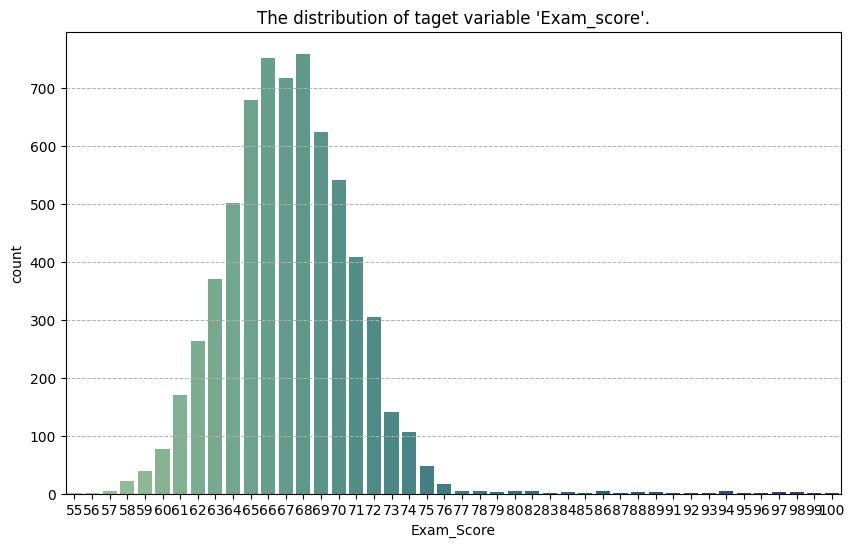

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Exam_Score"], palette='crest') # Create countplot
# Note : Count plot is normally used to show categorical values, but I preferred to use it for this feature
# because I wanted to see each score in detail.
plt.title("The distribution of taget variable 'Exam_score'.") # Set plot title
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

Distribution of categorical features :



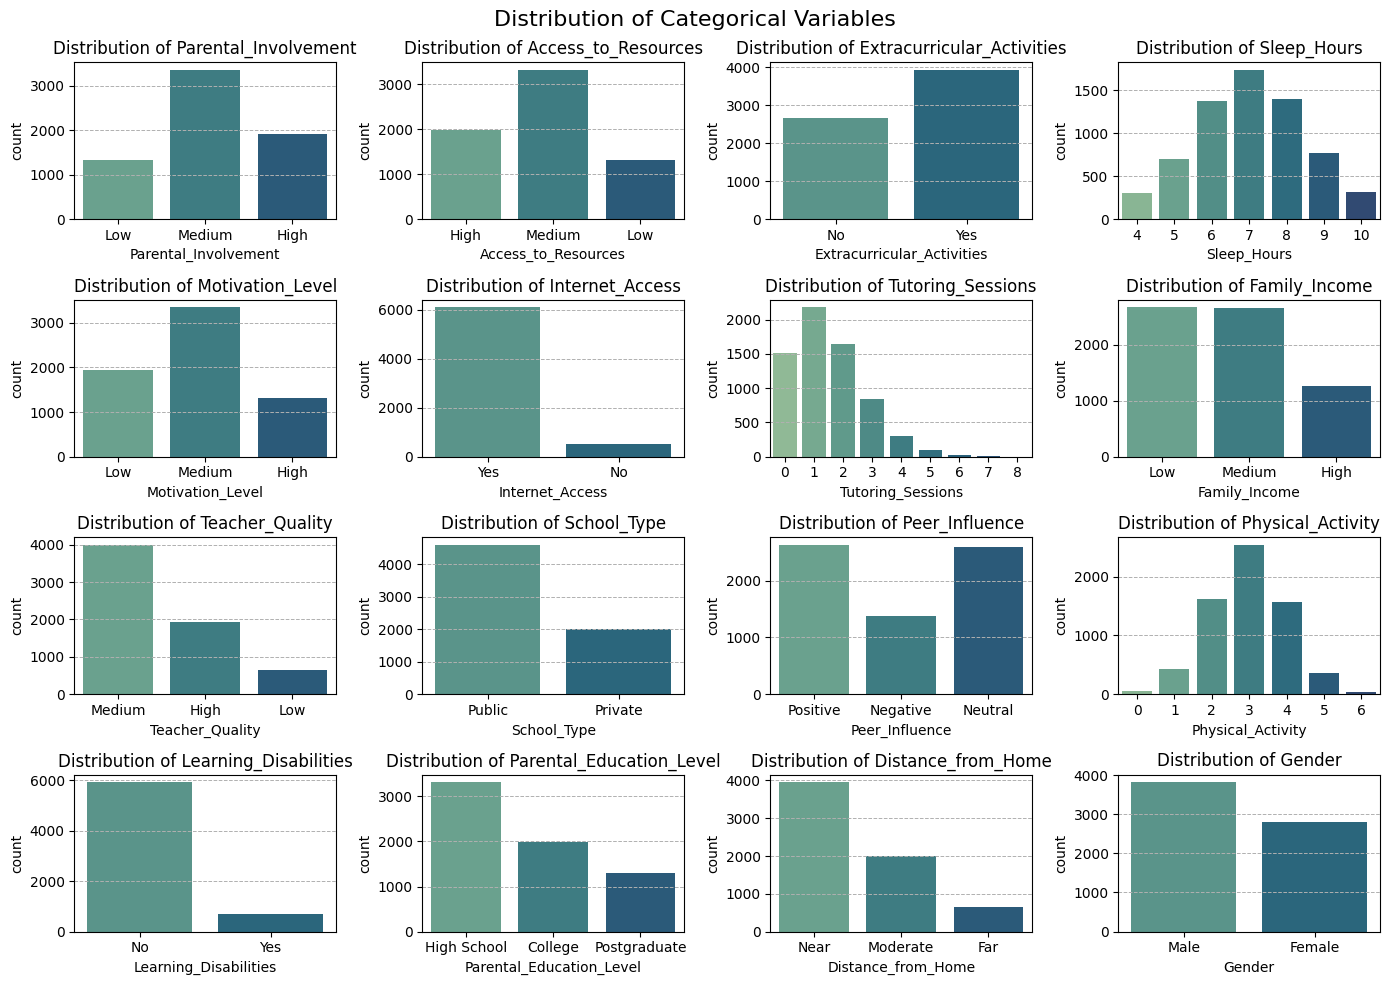

In [ ]:
# Create a 4x4 grid of countplots for categorical variable distributions
fig, axes = plt.subplots(4, 4, figsize=(14, 10))
fig.suptitle("Distribution of Categorical Variables", fontsize=16)
axes = axes.ravel() # Flatten the 2D array of axes to 1D for easier indexing

# Plot countplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], palette='crest', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)  # Add grid on y-axis

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots

Histogram of numerical features :

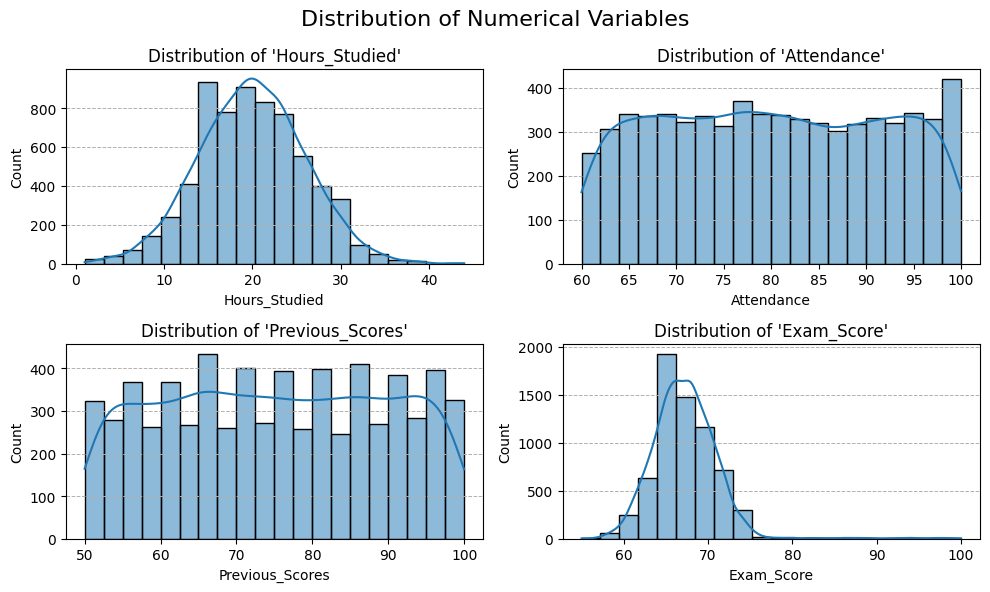

In [ ]:
fig , axes = plt.subplots(2,2,figsize=(10,6))
fig.suptitle("Distribution of Numerical Variables",fontsize=16)
axes = axes.ravel()
for i,col in enumerate(num_cols):
  sns.histplot(x=df[col],ax=axes[i],kde=True, bins=20)
  axes[i].set_title(f"Distribution of '{col}'")
  axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

Box plot of numerical features :

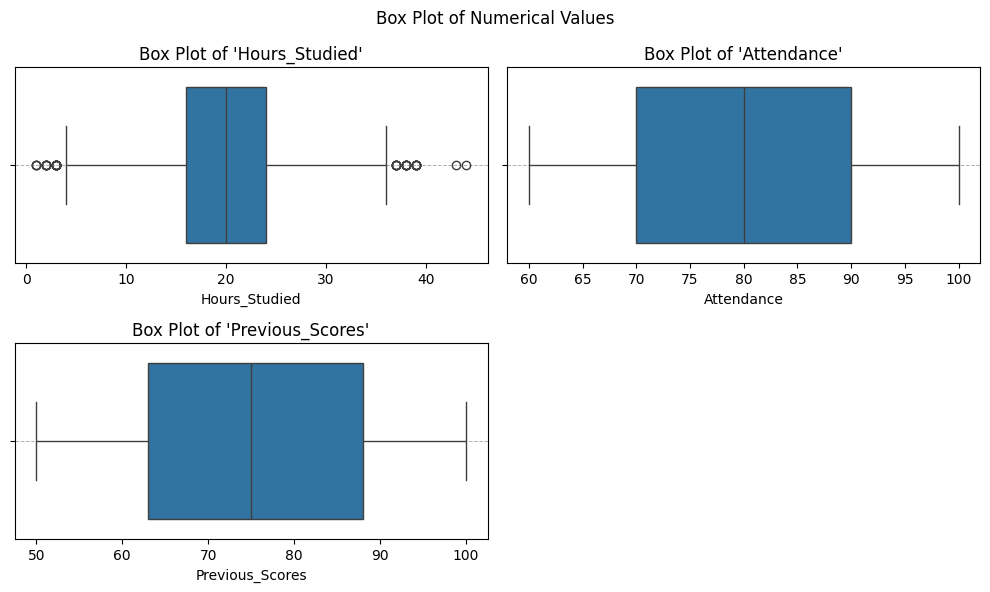

In [ ]:
# Create a 2x2 grid for boxplots of numerical columns
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Box Plot of Numerical Values")
axes = axes.ravel()

# Plot boxplot for each numerical column, excluding 'Exam_Score'
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of '{col}'")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

Violin plot is a more advanced version of box plot. In addition to the information shown by the box plot, it also gives us information about the density of the distribution.


Violin Plot of Numerical Values :

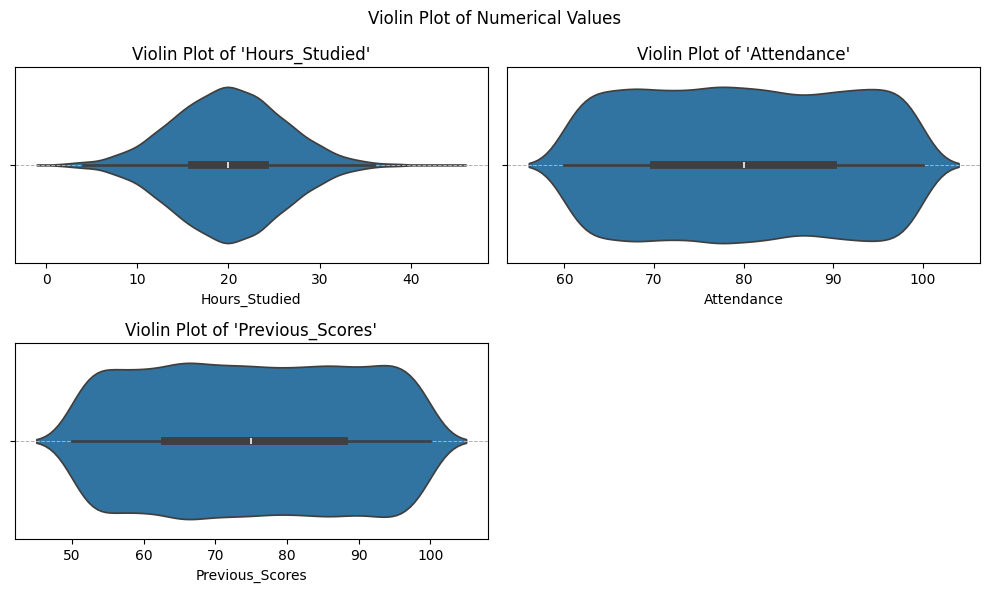

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Violin Plot of Numerical Values")
axes = axes.ravel()

for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.violinplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Violin Plot of '{col}'")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


Scatter plot for relationship between exam score and categorical variables :

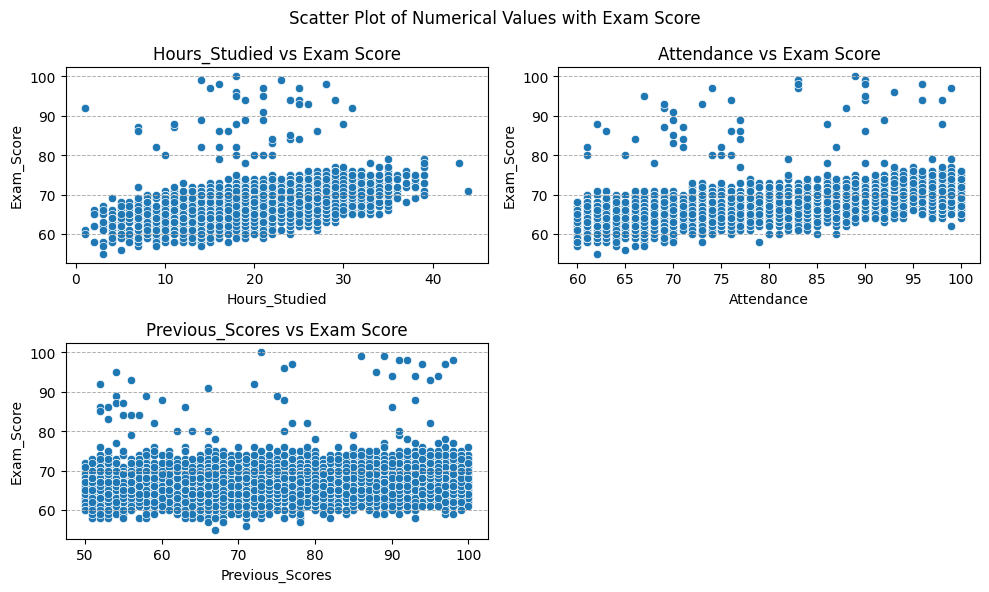

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Scatter Plot of Numerical Values with Exam Score")
axes = axes.ravel()
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.scatterplot(x=df[col], y=df["Exam_Score"], ax=axes[i])
    axes[i].set_title(f"{col} vs Exam Score")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

The charts show that Hours Studied and Attendance have a somewhat direct relationship with exam scores; as hours studied and attendance increase, exam scores tend to rise. On the other hand, Previous Scores do not appear to significantly impact exam performance; some students with high previous scores still receive low exam scores.


Boxplot for relationship between exam score and categorical columns :

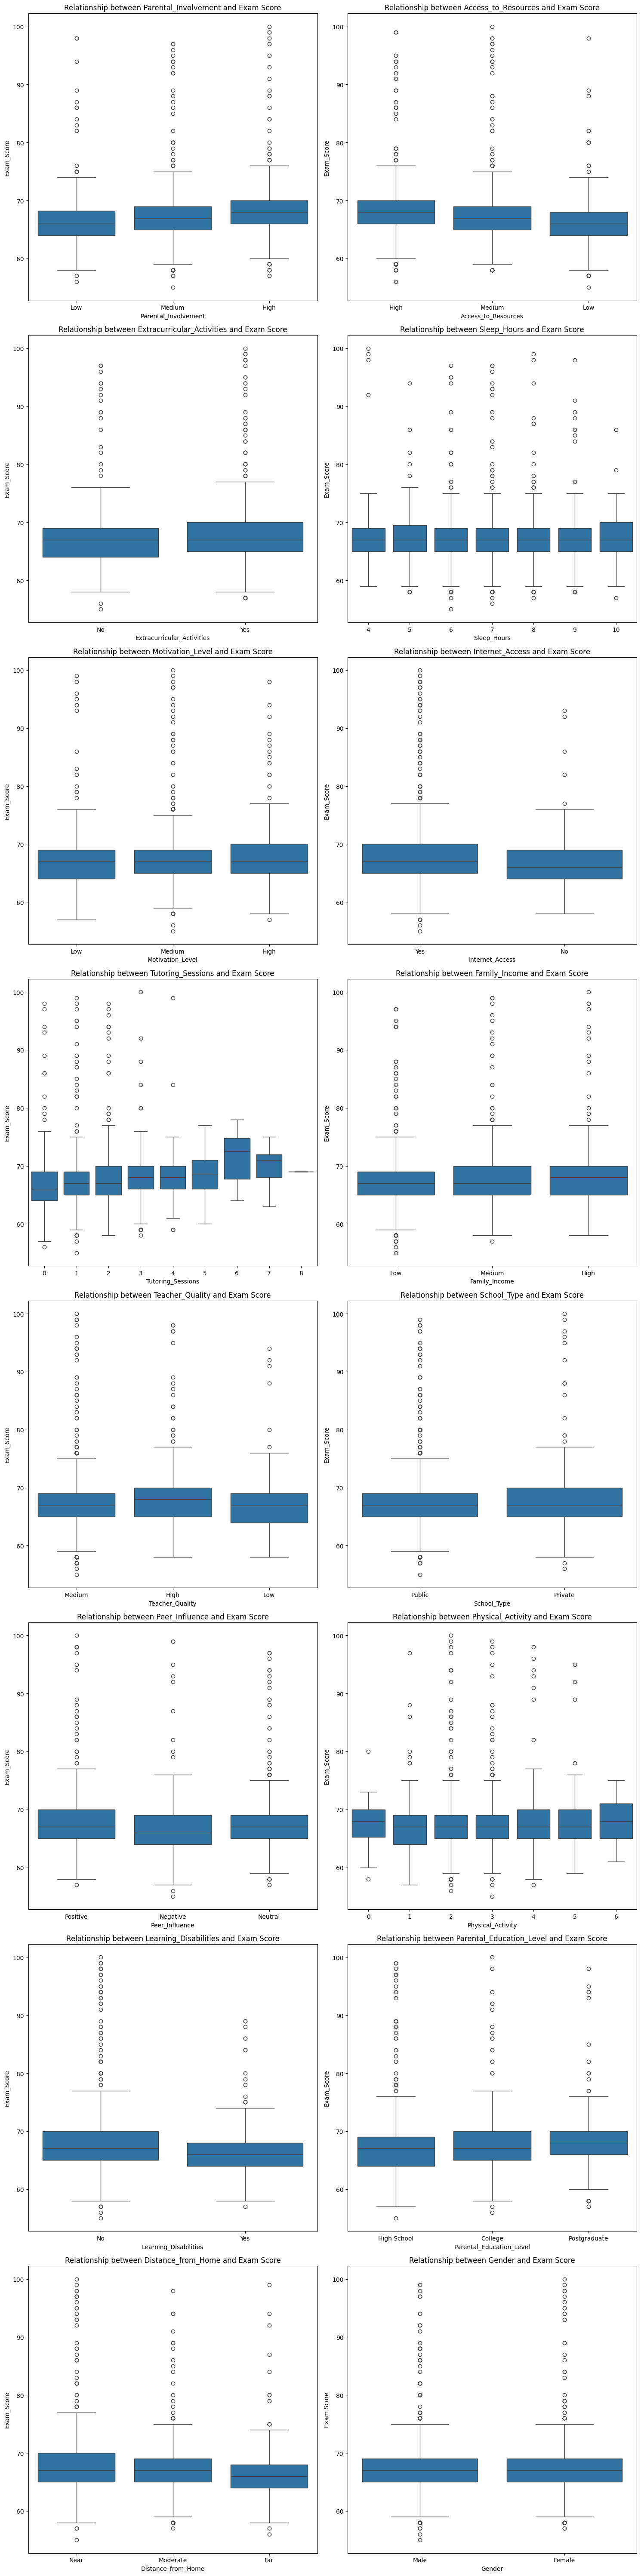

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(15, 60))

axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=df[col], y=df["Exam_Score"], ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and Exam Score')
    plt.xlabel(col)
    plt.ylabel("Exam Score")

plt.tight_layout()
plt.show()


Correlation matrix for Numerical Values :

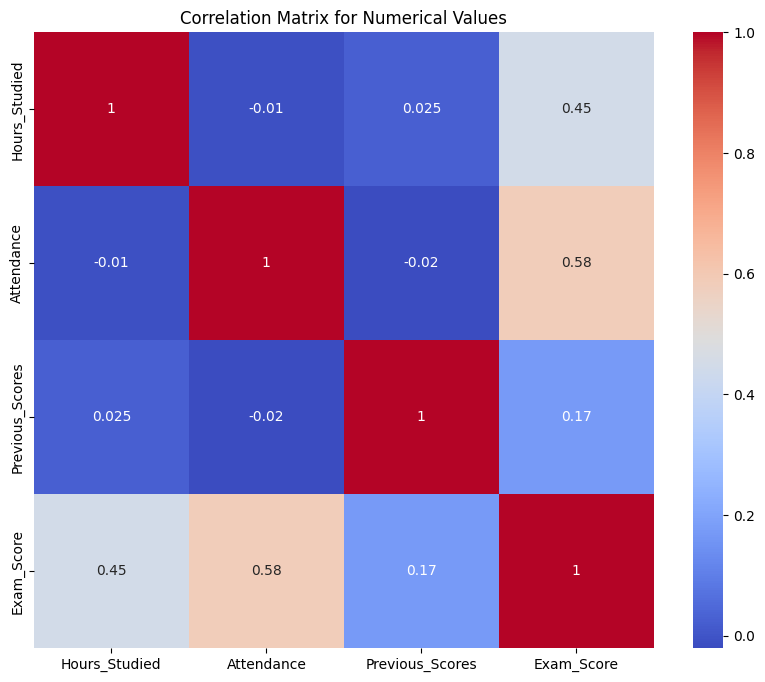

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[num_cols].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Visualize with annotations
plt.title("Correlation Matrix for Numerical Values")
plt.show()

In order to perform correlation analysis on categorical values, we need to use encoding methods on these values.

The correlation matrix indicates that Attendance has the strongest positive correlation with Exam Score (0.58), suggesting that higher attendance is associated with better exam performance. Hours Studied also shows a moderate positive correlation with Exam Score (0.45), implying that studying more hours may have a positive impact on exam results, though the effect is weaker than attendance. Previous Scores have a low correlation (0.17) with Exam Score, meaning past scores do not strongly influence current exam performance

# Label Encoding

Label encoding is necessary because many machine learning algorithms require numerical input. By converting categorical variables into numerical labels, we make the data compatible with models that cannot handle text directly.


Let's print the unique_values variable again to remember the categorical values and their values :

In [ ]:
print(unique_values)

Parental_Involvement                           [Low, Medium, High]
Access_to_Resources                            [High, Medium, Low]
Extracurricular_Activities                               [No, Yes]
Sleep_Hours                                 [7, 8, 6, 10, 9, 5, 4]
Motivation_Level                               [Low, Medium, High]
Internet_Access                                          [Yes, No]
Tutoring_Sessions                      [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                  [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low]
School_Type                                      [Public, Private]
Peer_Influence                       [Positive, Negative, Neutral]
Physical_Activity                            [3, 4, 2, 1, 5, 0, 6]
Learning_Disabilities                                    [No, Yes]
Parental_Education_Level      [High School, College, Postgraduate]
Distance_from_Home                           [Near, Moderate, 

Ordinal columns with an inherent order are encoded with predefined mappings,
while nominal categorical columns (without order) are encoded using label encoding.

In [ ]:
# Defining ordered categorical mappings for specific columns
ordered_data = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}
}

# Defining categorical columns for label encoding
label_columns = ['Gender', 'Extracurricular_Activities', "Internet_Access", "School_Type", "Learning_Disabilities"]

label_encoder = LabelEncoder()

# Applying label encoding to categorical columns
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Function to apply ordered encoding to specified columns
def encode_dataframe(df, ordered_data):
    for column in df.columns:
        if column in ordered_data:
            encoding = ordered_data[column]
            df[column] = df[column].map(encoding)

encode_dataframe(df, ordered_data)

In [ ]:
df.head(10)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   
5             19          88                     1                    1   
6             29          84                     1                    0   
7             25          78                     0                    2   
8             17          94                     1                    2   
9             23          98                     1                    1   

   Extracurricular_Activities Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0           7               73                 0   
1                           0           8               59                 0   
2                           1           7               91                 1   
3                           1           8               98                 1   
4                           1           6               65                 1   
5                           1           8               89                 1   
6                           1           7               68                 0   
7                           1           6               50                 1   
8                           0           6               80                 2   
9                           1           8               71                 1   

   Internet_Access Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1                 0              0                1   
1                1                 2              1                1   
2                1                 2              1                1   
3                1                 1              1                1   
4                1                 3              1                2   
5                1                 3              1                1   
6                1                 1              0                1   
7                1                 1              2                2   
8                1                 0              1                0   
9                1                 0              2                2   

   School_Type  Peer_Influence Physical_Activity  Learning_Disabilities  \
0            1               2                 3                      0   
1            1               0                 4                      0   
2            1               1                 4                      0   
3            1               0                 4                      0   
4            1               1                 4                      0   
5            1               2                 3                      0   
6            0               1                 2                      0   
7            1               0                 2                      0   
8            0               1                 1                      0   
9            1               2                 5                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       1          67  
1                         1                   1       0          61  
2                         2                   0       1          74  
3                         0                   1       1          71  
4                         1                   0       0          70  
5                         2                   0       1          71  
6                         0                   1       1          67  
7                         0                   2       1          66  
8                         1                   0

# Scaler


In data mining, when features have different value ranges, it can negatively impact the model's learning.

A scaler normalizes (min-max) or standardizes (Z-score) the data to bring feature values to a comparable level, helping the model produce more accurate results.


In [68]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
min_max_scaler = MinMaxScaler()

# Applying Min-Max scaling to all features
df[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']] = min_max_scaler.fit_transform(
    df[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']]
)


In [69]:
df.head(10)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.511628       0.600                     0                    2   
1       0.418605       0.100                     0                    1   
2       0.534884       0.950                     1                    1   
3       0.651163       0.725                     0                    1   
4       0.418605       0.800                     1                    1   
5       0.418605       0.700                     1                    1   
6       0.651163       0.600                     1                    0   
7       0.558140       0.450                     0                    2   
8       0.372093       0.850                     1                    2   
9       0.511628       0.950                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0     0.500000             0.46                 0   
1                           0     0.666667             0.18                 0   
2                           1     0.500000             0.82                 1   
3                           1     0.666667             0.96                 1   
4                           1     0.333333             0.30                 1   
5                           1     0.666667             0.78                 1   
6                           1     0.500000             0.36                 0   
7                           1     0.333333             0.00                 1   
8                           0     0.333333             0.60                 2   
9                           1     0.666667             0.42                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1              0.000              0                1   
1                1              0.250              1                1   
2                1              0.250              1                1   
3                1              0.125              1                1   
4                1              0.375              1                2   
5                1              0.375              1                1   
6                1              0.125              0                1   
7                1              0.125              2                2   
8                1              0.000              1                0   
9                1              0.000              2                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            1               2           0.500000                      0   
1            1               0           0.666667                      0   
2            1               1           0.666667                      0   
3            1               0           0.666667                      0   
4            1               1           0.666667                      0   
5            1               2           0.500000                      0   
6            0               1           0.333333                      0   
7            1               0           0.333333                      0   
8            0               1           0.166667                      0   
9            1               2           0.833333                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       1          67  
1                         1                   1       0          61  
2                         2                   0       1          74  
3                         0                   1       1          71  
4                         1                   0       0          70  
5                         2                   0       1          71  
6                         0                   1       1          67  
7                         0                   2       1          66  
8             

All necessary datapreprocessing techniques have been applied on the dataset, now our updated dataset is suitable for use in machine learning models.

# 📊 EXTRA : I found perfect package for data quality profiling and exploratory data analysis . We can get extra insights by checking it out.

In [70]:
# Install specific Numba version, YData Profiling, and upgrade Visions and YData Profiling
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39

In [71]:
# Generate a detailed data profiling report for the DataFrame (df) and display it in a Jupyter notebook
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**I will drop the attribute “Exam_Score” which is the target value for the model and split the dataframe into X and Y.**

In [72]:
X = df.drop(columns='Exam_Score',axis=1)
Y = df['Exam_Score']

In [73]:
X.head(10)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.511628       0.600                     0                    2   
1       0.418605       0.100                     0                    1   
2       0.534884       0.950                     1                    1   
3       0.651163       0.725                     0                    1   
4       0.418605       0.800                     1                    1   
5       0.418605       0.700                     1                    1   
6       0.651163       0.600                     1                    0   
7       0.558140       0.450                     0                    2   
8       0.372093       0.850                     1                    2   
9       0.511628       0.950                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0     0.500000             0.46                 0   
1                           0     0.666667             0.18                 0   
2                           1     0.500000             0.82                 1   
3                           1     0.666667             0.96                 1   
4                           1     0.333333             0.30                 1   
5                           1     0.666667             0.78                 1   
6                           1     0.500000             0.36                 0   
7                           1     0.333333             0.00                 1   
8                           0     0.333333             0.60                 2   
9                           1     0.666667             0.42                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1              0.000              0                1   
1                1              0.250              1                1   
2                1              0.250              1                1   
3                1              0.125              1                1   
4                1              0.375              1                2   
5                1              0.375              1                1   
6                1              0.125              0                1   
7                1              0.125              2                2   
8                1              0.000              1                0   
9                1              0.000              2                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            1               2           0.500000                      0   
1            1               0           0.666667                      0   
2            1               1           0.666667                      0   
3            1               0           0.666667                      0   
4            1               1           0.666667                      0   
5            1               2           0.500000                      0   
6            0               1           0.333333                      0   
7            1               0           0.333333                      0   
8            0               1           0.166667                      0   
9            1               2           0.833333                      0   

   Parental_Education_Level  Distance_from_Home  Gender  
0                         0                   0       1  
1                         1                   1       0  
2                         2                   0       1  
3                         0                   1       1  
4                         1                   0       0  
5                         2                   0       1  
6                         0                   1       1  
7                         0                   2       1  
8                         1                   0       1  
9                         0                   1       1

In [74]:
Y.head(10)

0    67
1    61
2    74
3    71
4    70
5    71
6    67
7    66
8    69
9    72
Name: Exam_Score, dtype: int64

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import (GradientBoostingRegressor)

In [76]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso": Lasso(),
    "Support Vector Regression": SVR(),
    "Bayesian Ridge": BayesianRidge(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

In [77]:
param_for_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [0.1, 0.5, 1.0]},
    "Ridge Regression": {"alpha": [0.1, 1.0, 10.0]},
    "Bayesian Ridge": {
    'alpha_1': [1e-6, 0.1, 10],
    'lambda_init': [1e-12, 1e-3, 10] },
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]},
    "Support Vector Regression": {"C": [0.1, 1.0, 10.0], "epsilon": [0.1, 0.2, 0.5]}
}

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [79]:
def manual_cross_val_score_loss(X, y, model, param_grid, cv):
    n = len(X)
    fold_size = n // cv

    # Parametre kombinasyonlarını oluştur
    param_combinations = list(product(*param_grid.values()))
    best_loss = np.inf  # Kayıp değeri minimize edilecek
    best_params = None

    # Skorları kaydetmek için liste
    results = []

    # Her parametre kombinasyonu için
    for params in param_combinations:
        model.set_params(**dict(zip(param_grid.keys(), params)))

        # Cross-validation işlemi
        fold_losses = []
        for fold in range(cv):
            start_idx = fold * fold_size
            end_idx = start_idx + fold_size
            val_indices = list(range(start_idx, end_idx))
            train_indices = list(set(range(n)) - set(val_indices))

            # Use .iloc to select rows based on indices
            X_train_cv = X.iloc[train_indices]
            y_train_cv = y.iloc[train_indices]
            X_val_cv = X.iloc[val_indices]
            y_val_cv = y.iloc[val_indices]

            # Modeli eğit
            model.fit(X_train_cv, y_train_cv)

            # Tahmin ve kayıp hesaplama
            y_pred = model.predict(X_val_cv)
            fold_loss = mean_squared_error(y_val_cv, y_pred)  # Kayıp fonksiyonu
            fold_losses.append(fold_loss)

        mean_fold_loss = np.mean(fold_losses)  # Ortalama kayıp
        results.append((params, mean_fold_loss))

        if mean_fold_loss < best_loss:  # En düşük kaybı bul
            best_loss = mean_fold_loss
            best_params = dict(zip(param_grid.keys(), params))

    # Sonuçları DataFrame'e dönüştür
    results_df = pd.DataFrame(results, columns=["Params", "Loss"])

    # Görselleştirme: Parametre kombinasyonlarına göre kayıp
    model_name = type(model).__name__  # Modelin ismini al

    plot_model_performance(model_name, param_grid, results_df, best_loss, best_params)

    return best_loss, best_params

In [80]:
def plot_model_performance(model_name, param_grid, results_df, best_loss, best_params):
    if model_name == "LinearRegression":
        # LinearRegression için metin grafiği
        plt.figure(figsize=(10, 8))  # Grafik boyutu belirlemek için
        plt.text(0.5, 0.5, f"Linear Regression doesn't have any hyperparameter", ha='center', va='center', fontsize=12)
        plt.text(0.5, 0.3, f"MSE: {best_loss:.6f}", ha='center', va='center', fontsize=10)
        # Grafik çizme işlemi olmadan metinleri ekrana yazdır
        plt.axis('off')  # Grafik eksenlerini gizle
        plt.show()

    elif len(param_grid) == 2:  # Eğer iki parametre varsa
        param_1, param_2 = param_grid.keys()
        results_df[param_1] = [p[0] for p in results_df["Params"]]
        results_df[param_2] = [p[1] for p in results_df["Params"]]
        pivot = results_df.pivot(index=param_1, columns=param_2, values="Loss")

        plt.figure(figsize=(10, 8))
        ax = sns.heatmap(pivot, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Loss'})
        plt.title(f"{model_name} Hyperparameter Loss Heatmap")
        plt.xlabel(param_2)
        plt.ylabel(param_1)

        # En iyi parametreler ve kayıp skoru grafiğin içine yaz
        best_params_text = f"Best Parameters: {best_params}\nBest MSE Score: {best_loss:.3f}"
        plt.text(0.5, -0.2, best_params_text, fontsize=10, color="blue",
                 transform=ax.transAxes, ha="center", va="top", bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

        plt.show()

    else:  # Tek boyutlu parametrelerde çizgi grafiği
        params_flat = [str(p) for p in results_df["Params"]]
        plt.figure(figsize=(12, 6))
        plt.plot(params_flat, results_df["Loss"], marker='o', linestyle='-', color='b')
        plt.title(f"{model_name} Loss Function Across Hyperparameters")
        plt.xlabel("Hyperparameter Combinations")
        plt.ylabel("Loss (MSE)")
        plt.xticks(rotation=45)
        plt.grid(True)

        # En iyi parametreler ve kayıp skoru grafiğin içine yaz
        best_params_text = f"Best Parameter: {best_params}\nBest MSE Score: {best_loss:.6f}"
        plt.text(len(params_flat) / 2, min(results_df["Loss"]), best_params_text, fontsize=10, color="red",
                 bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

        plt.tight_layout()
        plt.show()


Linear Regression - Grid Search Başladı 



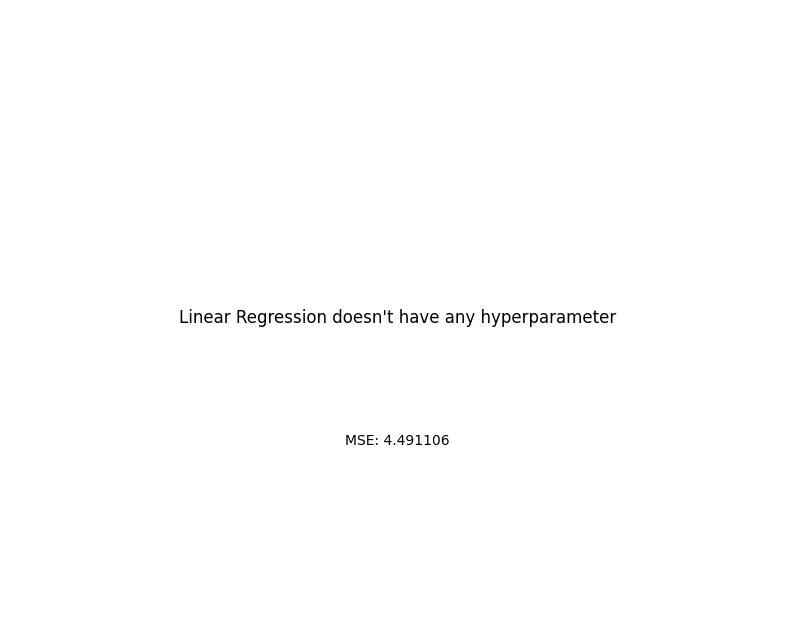




Ridge Regression - Grid Search Başladı 



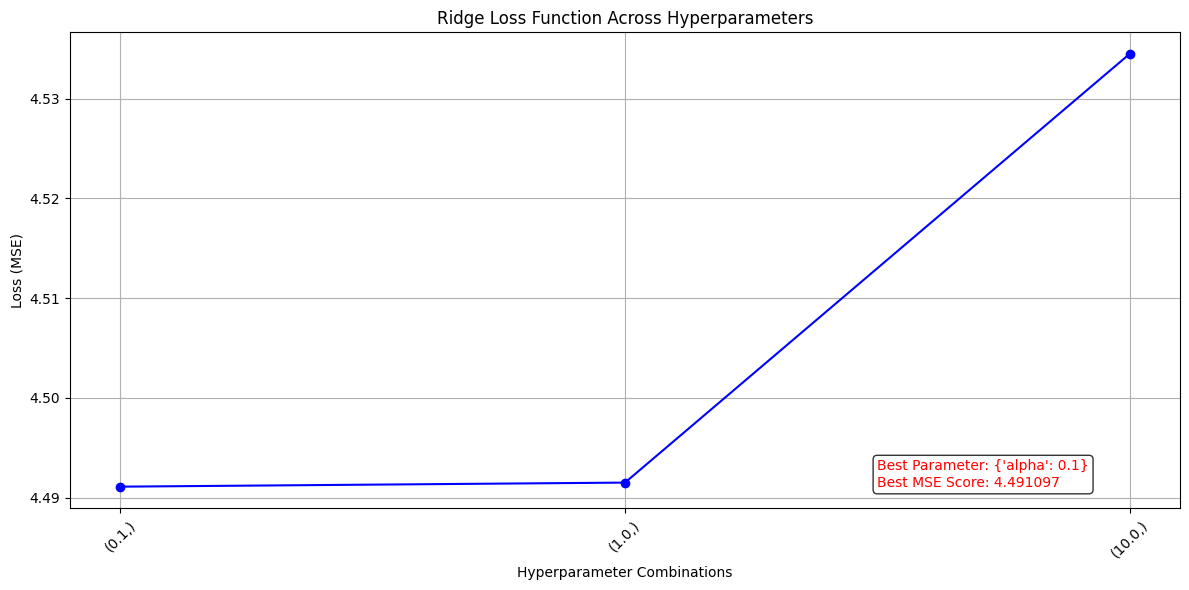




Lasso - Grid Search Başladı 



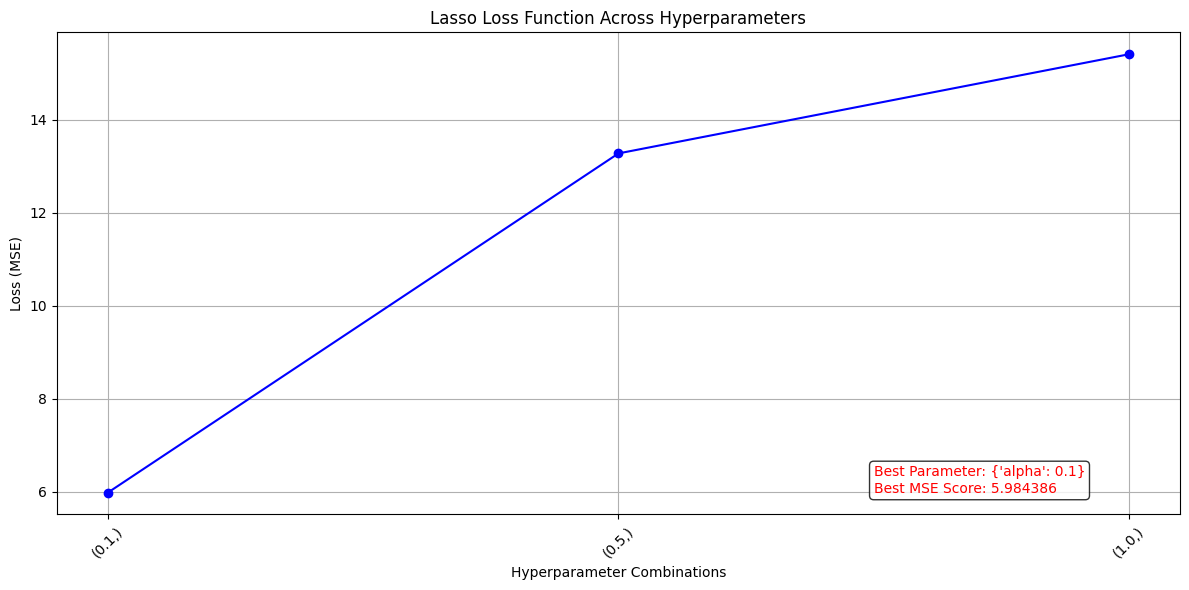




Support Vector Regression - Grid Search Başladı 



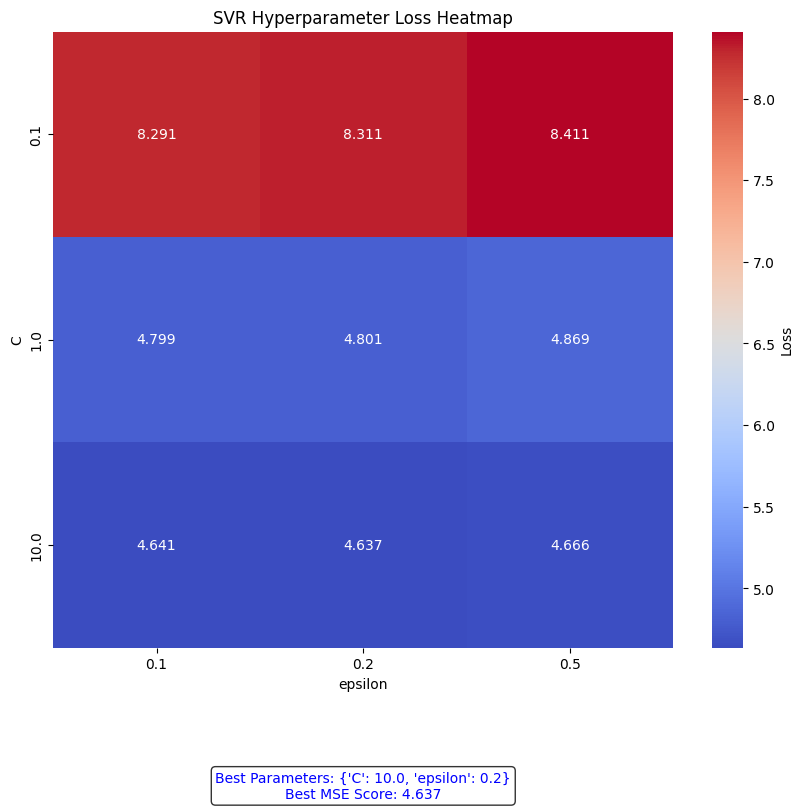




Bayesian Ridge - Grid Search Başladı 



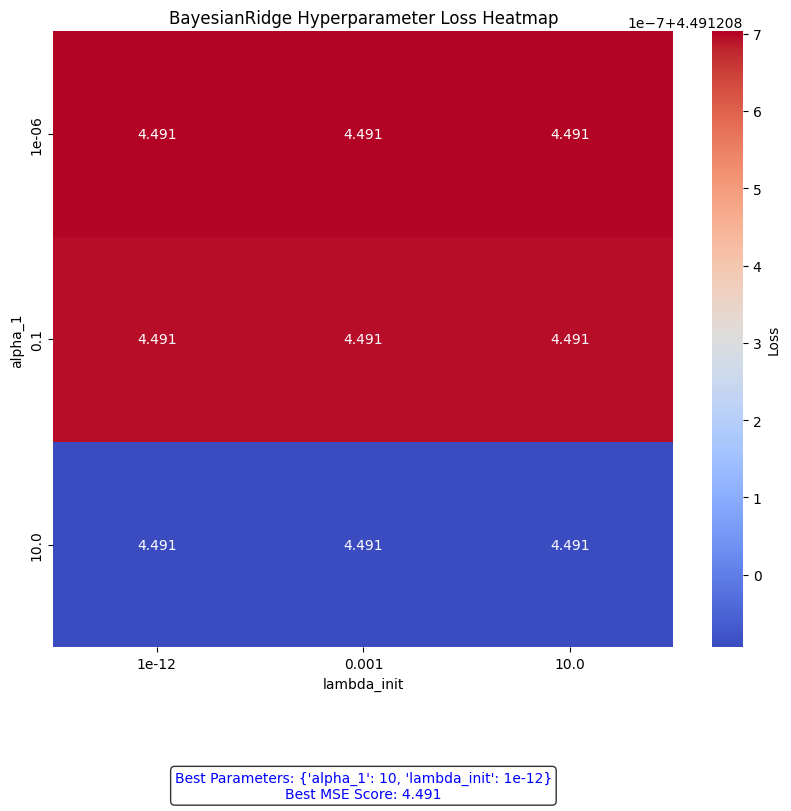




Gradient Boosting - Grid Search Başladı 



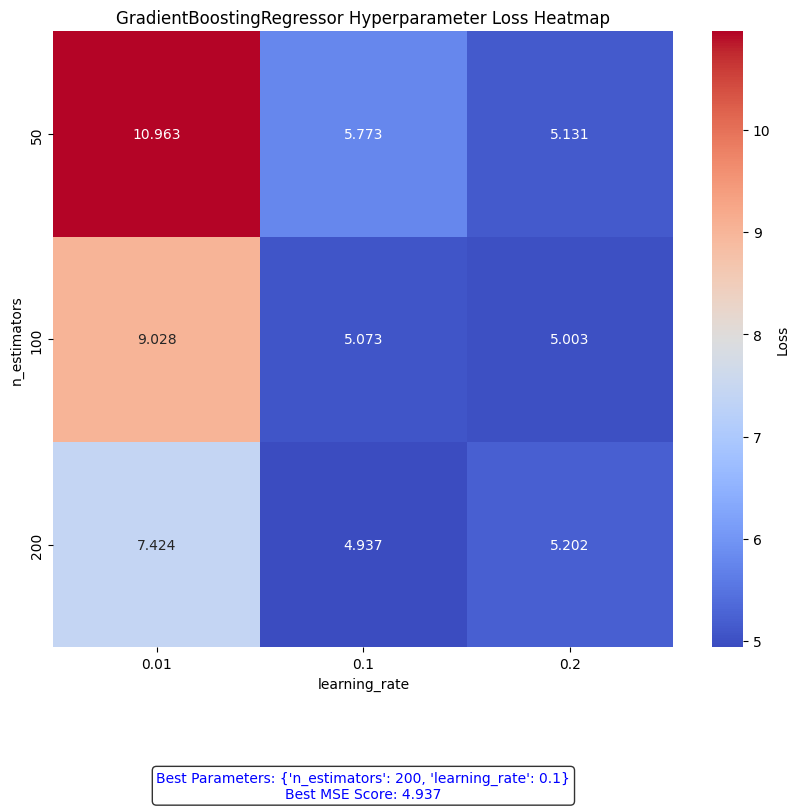

In [81]:
best_params = {}
best_scores = {}

# Grid Search ve Cross-Validation
for model_name, model in models.items():
    print(f"\n{model_name} - Grid Search Başladı \n")
    best_model = None
    best_param = None
    best_score = -np.inf

    # Parametreleri kontrol et ve Grid Search yap
    if model_name in param_for_grid:
        param_grid = param_for_grid[model_name]

        # Cross-validation ile parametreleri optimize et
        cv_score, params = manual_cross_val_score_loss(X_train, y_train, model, param_grid, cv=5)

        best_param = params
        best_score = cv_score

    # En iyi modeli kaydet
    best_params[model_name] = best_param
    best_scores[model_name] = best_score
    print("\n")

In [82]:
optimized_models = {}

for model_name, model in models.items():
    if model_name in best_params:
        # En iyi parametreleri modele uygula
        model.set_params(**best_params[model_name])
        # Modeli eğitim verisiyle yeniden eğit
        model.fit(X_train, y_train)
        # Güncellenen modeli kaydet
        optimized_models[model_name] = model

# Sonuçları kontrol et
for model_name, model in optimized_models.items():
    print(f"{model_name} optimize edilmiş model: {model}")

Linear Regression optimize edilmiş model: LinearRegression()
Ridge Regression optimize edilmiş model: Ridge(alpha=0.1)
Lasso optimize edilmiş model: Lasso(alpha=0.1)
Support Vector Regression optimize edilmiş model: SVR(C=10.0, epsilon=0.2)
Bayesian Ridge optimize edilmiş model: BayesianRidge(alpha_1=10, lambda_init=1e-12)
Gradient Boosting optimize edilmiş model: GradientBoostingRegressor(n_estimators=200, random_state=42)




Linear Regression modelini değerlendirme...

Linear Regression - Test Seti MSE: 2.3038



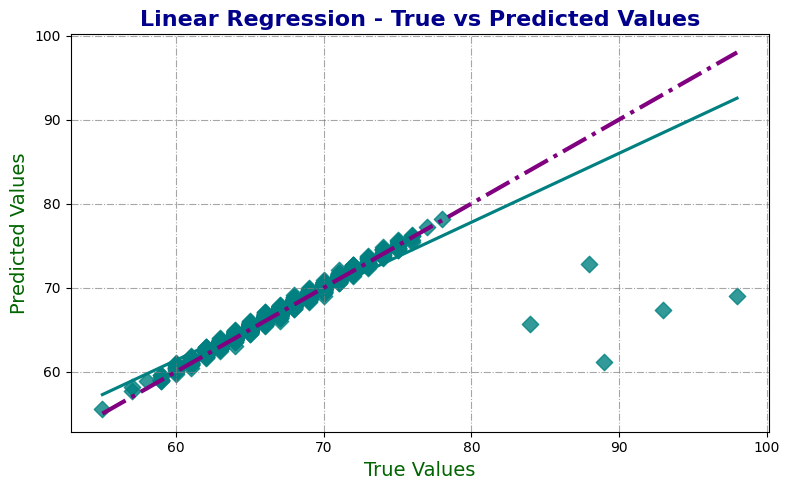



Ridge Regression modelini değerlendirme...

Ridge Regression - Test Seti MSE: 2.3040



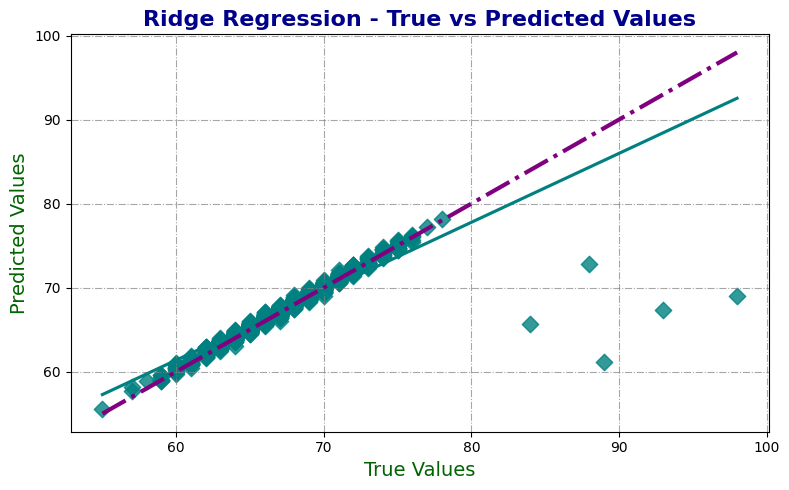



Lasso modelini değerlendirme...

Lasso - Test Seti MSE: 3.9211



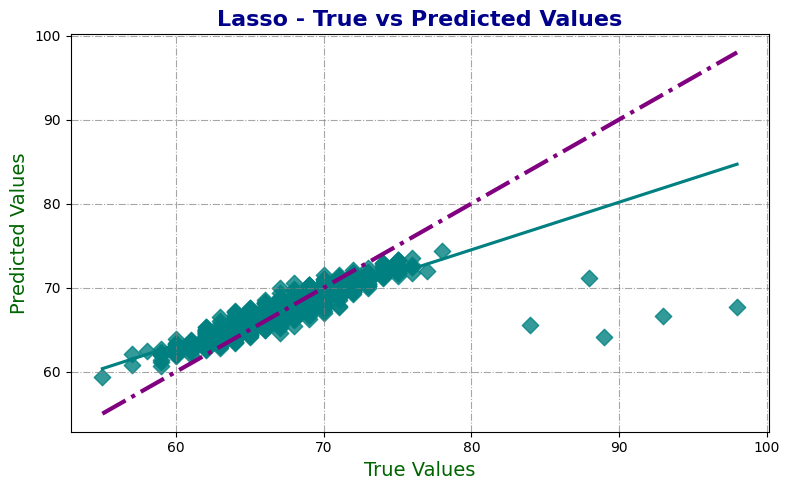



Support Vector Regression modelini değerlendirme...

Support Vector Regression - Test Seti MSE: 2.3969



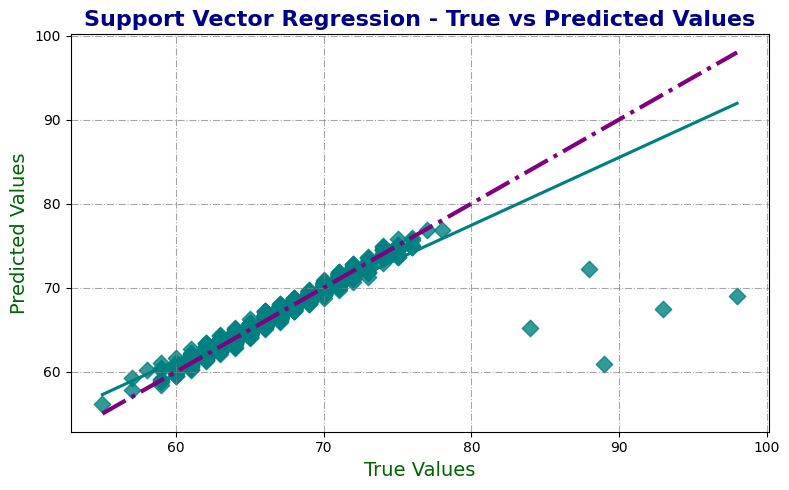



Bayesian Ridge modelini değerlendirme...

Bayesian Ridge - Test Seti MSE: 2.3047



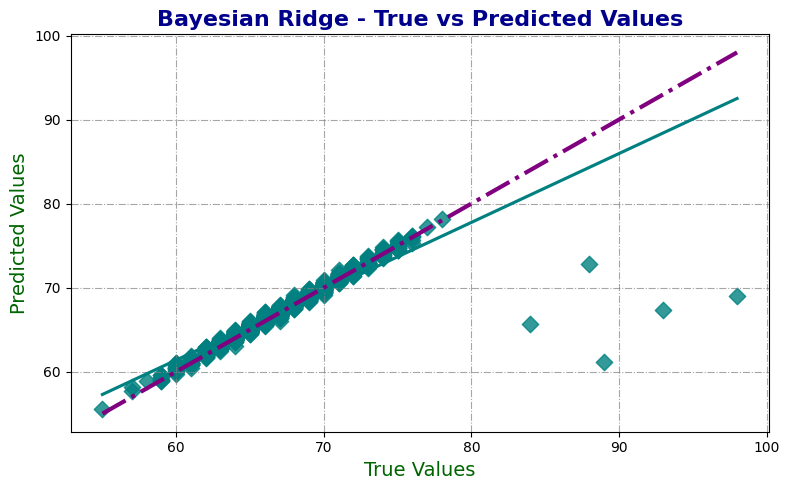



Gradient Boosting modelini değerlendirme...

Gradient Boosting - Test Seti MSE: 2.7664



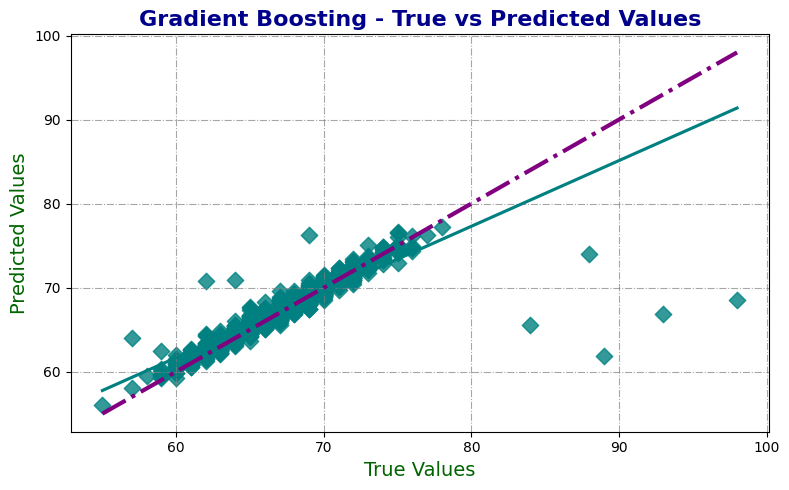

In [83]:
# Modelleri optimize et ve test setinde tahminler yap
for model_name, model in optimized_models.items():
    print("\n")
    print(f"{model_name} modelini değerlendirme...\n")

    # Test seti üzerinde tahminler yap
    y_pred = model.predict(X_test)

    # MSE hesapla
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Test Seti MSE: {mse:.4f}\n")

    # Plotting the comparison between True vs Predicted values using a scatter plot and regression line
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

    # Plotting reference line for perfect prediction
    max_val = max(max(y_test), max(y_pred))
    min_val = min(min(y_test), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

    # Setting plot titles and labels
    plt.title(f'{model_name} - True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('True Values', fontsize=14, color='darkgreen')
    plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

    # Adding grid and adjusting layout
    plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

    # Show plot for this model
    plt.tight_layout()
    plt.show()

In [84]:
# Modellerin isimlerini ve skorlarını saklamak için listeler
acc = []
names = ['Linear Regression', 'Ridge', 'Lasso', 'SVR', 'Bayesian Ridge', 'Gradient Boosting']

# Modellerin skorlarını hesapla
for model_name, model in optimized_models.items():
    # Test seti üzerinde tahminler yap
    y_pred = model.predict(X_test)

    # R2 skorunu hesapla (regresyon için)
    score = r2_score(y_test, y_pred)

    # Skoru listeye ekle
    acc.append(score)

# Sonuçları yazdır
for name, score in zip(names, acc):
    print(f"{name} - R2 Score: {score:.4f}")

Linear Regression - R2 Score: 0.8258
Ridge - R2 Score: 0.8258
Lasso - R2 Score: 0.7035
SVR - R2 Score: 0.8187
Bayesian Ridge - R2 Score: 0.8257
Gradient Boosting - R2 Score: 0.7908


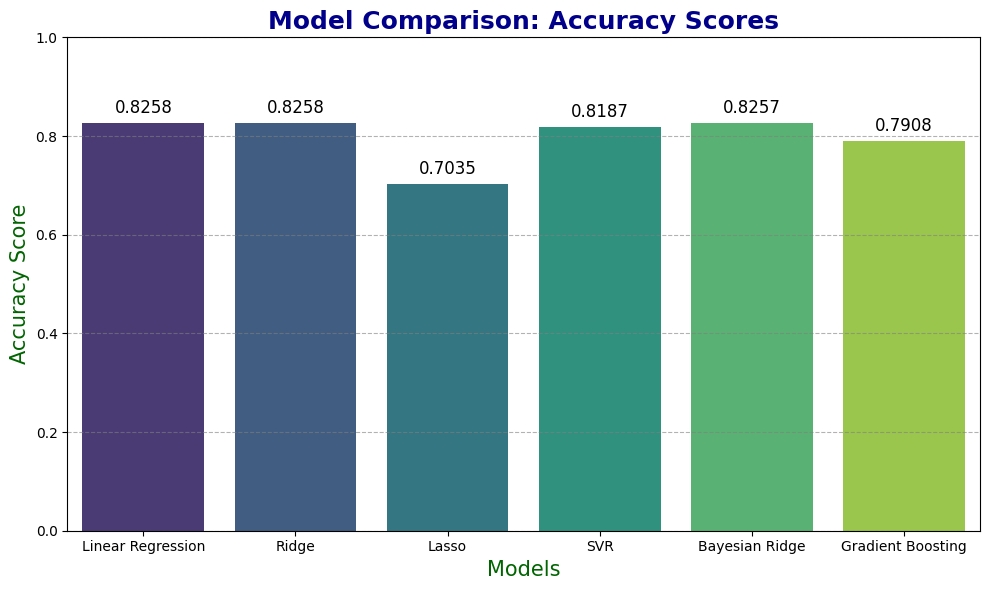

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the accuracy scores of the models
plt.figure(figsize=(10, 6))  # Daha büyük bir grafik boyutu

# Barplot çizimi
sns.barplot(x=names, y=acc, palette='viridis')

# Başlık, etiketler ve font ayarları
plt.title('Model Comparison: Accuracy Scores', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Models', fontsize=15, color='darkgreen')
plt.ylabel('Accuracy Score', fontsize=15, color='darkgreen')

# Y ekseni sınırları
plt.ylim(0, 1)  # Y ekseni 0 ile 1 arasında olmalı (doğruluk skorları için)

# Grid ayarları
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Her barın üzerine doğruluk skorlarını ekleyelim
for i, v in enumerate(acc):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, color='black')

# Grafik düzenini sıkılaştır
plt.tight_layout()

# Grafik gösterimi
plt.show()

In [86]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("r2_score: ",r2_score(y_test, y_pred))


mean_squared_error:  2.303764793629583
mean absolute error:  0.41027713354959855
r2_score:  0.8257919965237724


In [87]:
import pickle

In [88]:
filename = 'student_performance_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [89]:
# loading the saved model
loaded_model = pickle.load(open('student_performance_model.sav', 'rb'))

In [90]:
!pip install streamlit

In [91]:
pip install streamlit_option_menu

In [92]:
!pip install pyngrok

In [93]:
import os
from threading import Thread
from pyngrok import ngrok

In [94]:
# Add your ngrok token here
ngrok.set_auth_token('2qLGw3MH9KQEy1G2BQArVOBk2IG_48YMjXytVw3bMboNJHHxo')

In [95]:
def run_streamlit():
    # Change the port if 8501 is already in use or if you prefer another port
    os.system('/content/app.py --server.port 8501')

In [96]:
# Start a thread to run the Streamlit app
thread = Thread(target=run_streamlit)
thread.start()

In [97]:
# Open a tunnel to the streamlit port 8501
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print('Your Streamlit app is live at:', public_url)

Your Streamlit app is live at: NgrokTunnel: "https://bc23-34-75-216-187.ngrok-free.app" -> "http://localhost:8501"
